In [184]:
# importando as bibliotecas utilizadas
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import scienceplots 
import matplotlib.ticker as mtick

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

plt.style.use('science')

In [139]:
# importando os dados 

alcance_data = pd.read_csv("Alcance.csv",skiprows=2,encoding="utf-16")
genero_idade_data = pd.read_csv("seg_genero_idade.csv",skiprows=2)
paises_data = pd.read_csv("seg_paises.csv",skiprows=2)
cidades_data = pd.read_csv("seg_cidades.csv",skiprows=2)
visitas_data = pd.read_csv("Visitas.csv",skiprows=2,encoding="utf-16")

In [140]:
# Convertendo datas de string para formato date-time 

visitas_data.Data = pd.to_datetime(visitas_data.Data)
alcance_data.Data = pd.to_datetime(alcance_data.Data)

# convertendo porcentagens em números \in [0,1] 
genero_idade_data.Mulheres = pd.to_numeric(genero_idade_data.Mulheres.str[:-1].str.replace(',','.'))/100
genero_idade_data.Homens = pd.to_numeric(genero_idade_data.Homens.str[:-1].str.replace(',','.'))/100

paises_data.Valor = pd.to_numeric(paises_data.Valor.str[:-1].str.replace(',','.'))/100

cidades_data.Valor = pd.to_numeric(cidades_data.Valor.str[:-1].str.replace(',','.'))/100

In [141]:
genero_idade_data

,Idade,Mulheres,Homens
0,18-24,0.239,0.125
1,25-34,0.195,0.158
2,35-44,0.142,0.048
3,45-54,0.039,0.018
4,55-64,0.016,0.008
5,65+,0.010,0.002


In [142]:
alcance_data

,Data,Primary
0,2023-11-21,145
1,2023-11-22,109
2,2023-11-23,292
3,2023-11-24,237
4,2023-11-25,128
...,...,...
362,2024-11-17,99
363,2024-11-18,623
364,2024-11-19,52
365,2024-11-20,56


In [143]:
paises_data

,Principais países,Valor
0,Brasil,0.986
1,Índia,0.004
2,Espanha,0.004
3,Estados Unidos,0.004
4,Argentina,0.002
5,Chile,0.002
6,Equador,0.002


In [144]:
cidades_data

,Principais cidades,Valor
0,"Santa Maria, RS",0.702
1,"Divinópolis, MG",0.018
2,"Pelotas, RS",0.014
3,"Porto Alegre, RS",0.012
4,"São Paulo, SP",0.011
5,"Curitiba, PR",0.007
6,"Rio de Janeiro, RJ",0.007
7,"Cachoeira do Sul, RS",0.007
8,"Florianópolis, SC",0.005
9,"Viamão, RS",0.005


In [145]:
visitas_data

,Data,Primary
0,2023-11-21,13
1,2023-11-22,4
2,2023-11-23,8
3,2023-11-24,6
4,2023-11-25,29
...,...,...
362,2024-11-17,1
363,2024-11-18,15
364,2024-11-19,5
365,2024-11-20,0


In [146]:
genero_idade_data['Total'] = genero_idade_data.Mulheres + genero_idade_data.Homens

/tmp/ipykernel_37425/4242775388.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/tmp/ipykernel_37425/4242775388.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


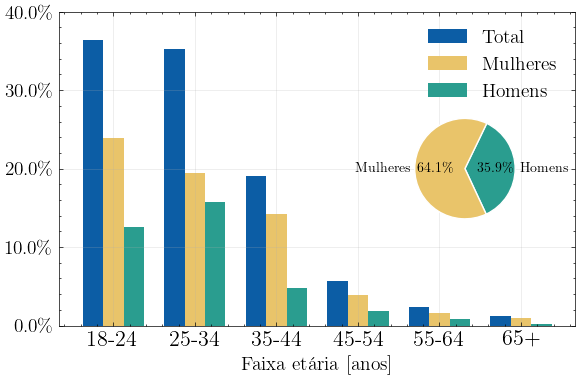

In [224]:
fig, ax = plt.subplots(figsize=(6, 4))
x = np.arange(len(genero_idade_data.Idade))

labels='Homens','Mulheres'
sizes = [genero_idade_data.Homens.sum(),genero_idade_data.Mulheres.sum()]

ax.bar(x-0.25,genero_idade_data.Total,width=0.25,label='Total')
ax.bar(x,genero_idade_data.Mulheres,width=0.25,label='Mulheres',color='#e9c46a')
ax.bar(x+0.25,genero_idade_data.Homens,width=0.25,label='Homens',color='#2a9d8f')
ax.set_xticks(x,labels=genero_idade_data.Idade.values,fontsize=16)
#vals = pkt.get_yticks()
#plt.yticklabels(['{:,.2%}'.format(x) for x in vals])
ax.set_yticks(np.linspace(0,0.4,5),labels=["0%","10%","20%","30%","40%"],fontsize=14)
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))
#plt.ylabel('Porcentagem',fontsize=14)

ax_inset = inset_axes(ax, width="40%", height="40%", loc='center right')
ax_inset.pie(sizes, labels=labels, autopct='%1.1f%%',wedgeprops=dict(width=1, edgecolor='w'),startangle=295,colors=['#2a9d8f','#e9c46a'])
#ax_inset.set_title('Distribuição Absoluta', fontsize=10)
ax_inset.tick_params(axis='x', labelsize=8)
ax_inset.tick_params(axis='y', labelsize=8)

ax.set_xlabel("Faixa etária [anos]",fontsize=14)
ax.legend(fontsize=14)
ax.grid(alpha=0.3)
fig.tight_layout()
plt.savefig('distribuicao_etaria.png',dpi=300)
fig.show()

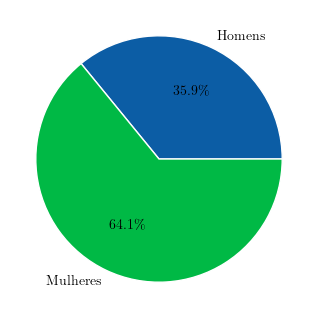

In [176]:
labels='Homens','Mulheres'
sizes = [genero_idade_data.Homens.sum(),genero_idade_data.Mulheres.sum()]

fig, ax = plt.subplots(figsize=(6,4))
ax.pie(sizes, labels=labels, autopct='%1.1f%%',wedgeprops=dict(width=1, edgecolor='w'))

plt.show()

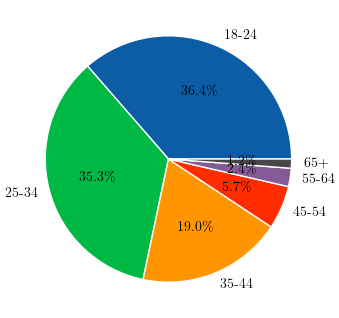

In [182]:
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(genero_idade_data.Total, labels=genero_idade_data.Idade.values, autopct='%1.1f%%',wedgeprops=dict(width=1, edgecolor='w'))

plt.show()

/tmp/ipykernel_37425/2582822003.py:22: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


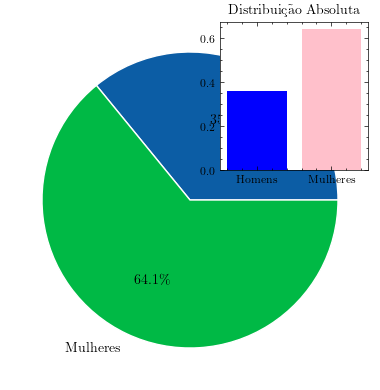

In [183]:
import matplotlib.pyplot as plt

# Dados
labels = ['Homens', 'Mulheres']
sizes = [genero_idade_data.Homens.sum(), genero_idade_data.Mulheres.sum()]

# Criando a figura principal
fig, ax = plt.subplots(figsize=(6, 4))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', wedgeprops=dict(width=1, edgecolor='w'))

# Criando o inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Localizando o inset no canto superior direito
ax_inset = inset_axes(ax, width="40%", height="40%", loc='upper right')
ax_inset.bar(labels, sizes, color=['blue', 'pink'])
ax_inset.set_title('Distribuição Absoluta', fontsize=10)
ax_inset.tick_params(axis='x', labelsize=8)
ax_inset.tick_params(axis='y', labelsize=8)

# Exibindo o gráfico
plt.tight_layout()
plt.show()